In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
data = pd.read_csv("data/housing.csv")
data_df = pd.DataFrame(data)
data_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
data_df.info()
data_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
data_df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

## Ploting scatter plot on Median v/s Median House values

<Axes: xlabel='median_income', ylabel='median_house_value'>

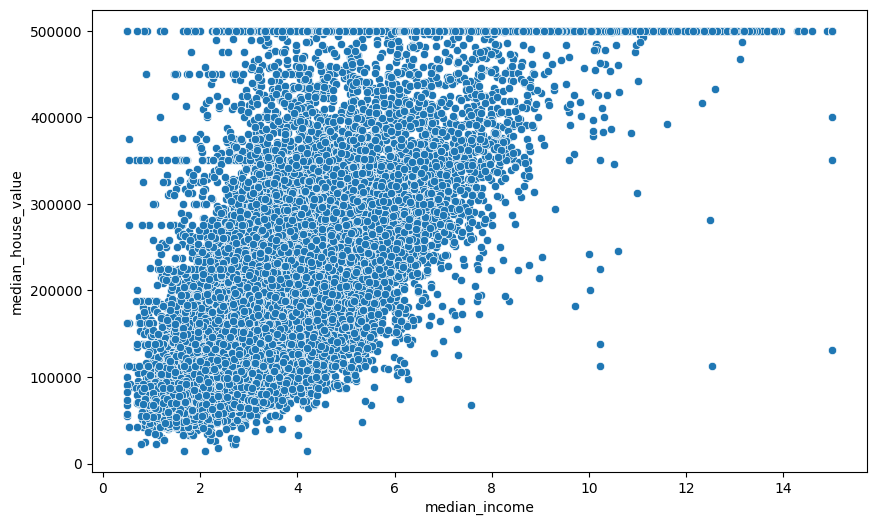

In [16]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='median_income', y='median_house_value')

## Creating Linear Model

In [44]:
model = LinearRegression()
model.fit(X=data_df[['median_income']],y=data_df[['median_house_value']])

LinearRegression()

## Evaluate the Model

In [25]:
# print coefficnets
print(f"Intercept: {model.intercept_}")
print(f"Coefficents: {model.coef_}")

print(f"Line Equation is : Y = {model.coef_}*X + {model.intercept_}")

Intercept: [45085.57670327]
Coefficents: [[41793.8492019]]
Line Equation is : Y = [[41793.8492019]]*X + [45085.57670327]


# Model Predicions

In [19]:
model.predict(X=[[12],[1],[10]])

d:\AI & ML\ML FOUNDATION\LABS\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[546611.76712602],
       [ 86879.42590516],
       [463024.06872223]])

## Plot Regression Line against training data

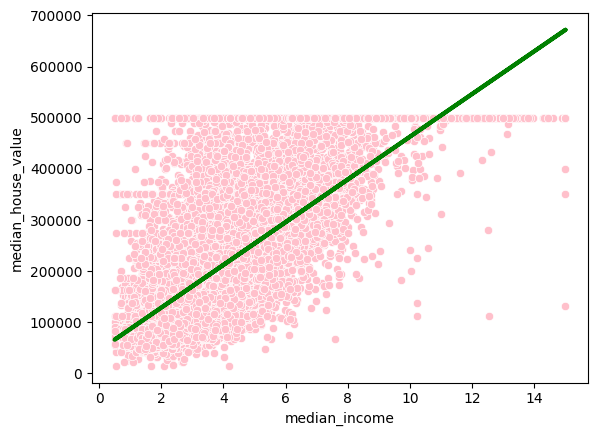

In [26]:
sns.scatterplot(data=data_df, x='median_income', y='median_house_value',color = "pink")
plt.plot(data_df[['median_income']], model.predict(data_df[['median_income']]), color = "green",linewidth =3)
plt.show()

## Mean Absolute Error

In [43]:

mae = mean_absolute_error(data_df[['median_house_value']],  model.predict(data_df[['median_income']]))
print(f"Mean Absolute Error: {mae}")
mse = mean_squared_error(data_df[['median_house_value']],  model.predict(data_df[['median_income']]))
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 62625.9337911434
Mean Squared Error: 7011311502.929527
